<a href="https://colab.research.google.com/github/angeland001/CampusCrowdCheckers/blob/FinalDemo/TheBasicswithScikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def PreprocessWordData(wordfiles):
    ArrayOfSpanishWords = []
    ArrayOfEnglishWords = []
    ArrayOfGermanWords = []

    for file in wordfiles:
        with open(file, "r", encoding="latin-1") as f:
            for line in f:
                if len(line.strip()) == 5:  # Assuming you want to check the length of stripped line
                    if "espanol" in file.lower():
                        ArrayOfSpanishWords.append(line.strip())
                    elif "english" in file.lower():
                        ArrayOfEnglishWords.append(line.strip())
                    elif "german" in file.lower():
                        ArrayOfGermanWords.append(line.strip())

    return ArrayOfGermanWords, ArrayOfEnglishWords, ArrayOfSpanishWords


In [ ]:
GermanWords, EnglishWords, SpanishWords = PreprocessWordData(["/content/german.txt","/content/english.txt", "/content/espanol.txt"])

In [ ]:
print(EnglishWords)
print(GermanWords)
print(SpanishWords)

['aaron', 'ababa', 'abaca', 'abaci', 'aback', 'abacs', 'abaft', 'aband', 'abase', 'abash', 'abask', 'abate', 'abaya', 'abbas', 'abbes', 'abbey', 'abbot', 'abeam', 'abear', 'abeds', 'abele', 'abets', 'abhor', 'abide', 'abies', 'abler', 'ablet', 'ablow', 'abode', 'aboil', 'abord', 'abore', 'abort', 'about', 'above', 'abram', 'abray', 'abrim', 'abrin', 'abrus', 'absey', 'absit', 'abuna', 'abune', 'abuse', 'abuts', 'abuzz', 'abyes', 'abysm', 'abyss', 'acari', 'accoy', 'accra', 'acerb', 'acers', 'ached', 'aches', 'acids', 'acing', 'acini', 'ackee', 'acmes', 'acock', 'acold', 'acorn', 'acred', 'acres', 'acrid', 'acryl', 'acted', 'acter', 'actin', 'acton', 'actor', 'actus', 'acute', 'adage', 'adams', 'adapt', 'adays', 'addax', 'added', 'adder', 'addie', 'addio', 'addis', 'addle', 'adeem', 'adela', 'adele', 'adept', 'adieu', 'adige', 'adios', 'adits', 'adler', 'adman', 'admin', 'admit', 'admix', 'adobe', 'adolf', 'adopt', 'adore', 'adorn', 'adown', 'adrad', 'adred', 'adsum', 'adult', 'adunc', 

In [ ]:
training_dataset = []
target_dataset = []

for word in EnglishWords:
  training_dataset.append([ord(char) for char in word])
  target_dataset.append(0)
for word in GermanWords:
  training_dataset.append([ord(char) for char in word])
  target_dataset.append(1)
for word in SpanishWords:
  training_dataset.append([ord(char) for char in word])
  target_dataset.append(2)


In [ ]:
from sklearn.model_selection import train_test_split

def split_dataset(training_dataset, target_dataset, test_size=0.2, random_state=None):
  #Split into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(training_dataset, target_dataset, test_size=test_size, random_state=random_state)
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_dataset(training_dataset, target_dataset, test_size=0.2, random_state=42)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier

knn_model = KNeighborsClassifier()
svm_model = svm.SVC()
mlp_nn = MLPClassifier()

In [ ]:
knn_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
mlp_nn.fit(X_train, y_train)


MLPClassifier()

In [ ]:
import random

# Select a random index from X_test
random_index = random.randint(0, len(X_test) - 1)

# Select the word corresponding to the random index from X_test and its corresponding label
random_word = X_test[random_index]
actual_label = y_test[random_index]

# Print the selected word
print("Selected word from testing set:", random_word)

# Predictions for the selected word using the trained models
knn_prediction = knn_model.predict([random_word])
svm_prediction = svm_model.predict([random_word])
mlp_prediction = mlp_nn.predict([random_word])

# Define a function to convert predicted label to language
def label_to_language(label):
    if label == 0:
        return "English"
    elif label == 1:
        return "German"
    elif label == 2:
        return "Spanish"
    else:
        return "Unknown"

# Print predictions and whether they match the actual language
print("KNN Prediction:", label_to_language(knn_prediction), "Actual Language:", label_to_language(actual_label))
print("SVM Prediction:", label_to_language(svm_prediction), "Actual Language:", label_to_language(actual_label))
print("MLP Prediction:", label_to_language(mlp_prediction), "Actual Language:", label_to_language(actual_label))




Selected word from testing set: [98, 117, 114, 107, 97]
KNN Prediction: Spanish Actual Language: English
SVM Prediction: English Actual Language: English
MLP Prediction: Spanish Actual Language: English


In [ ]:
knn_predictions = knn_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)
mlp_predictions = mlp_nn.predict(X_test)

from sklearn.metrics import accuracy_score

knn_accuracy = accuracy_score(y_test,knn_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)
mlp_accuracy = accuracy_score(y_test, mlp_predictions)

print("Accuracy for KNN model:", knn_accuracy)
print("Accuracy for SVM model:", svm_accuracy)
print("Accuracy for MLP Neural Network model:", mlp_accuracy)


Accuracy for KNN model: 0.7398500129299198
Accuracy for SVM model: 0.7489009568140678
Accuracy for MLP Neural Network model: 0.7230411171450737


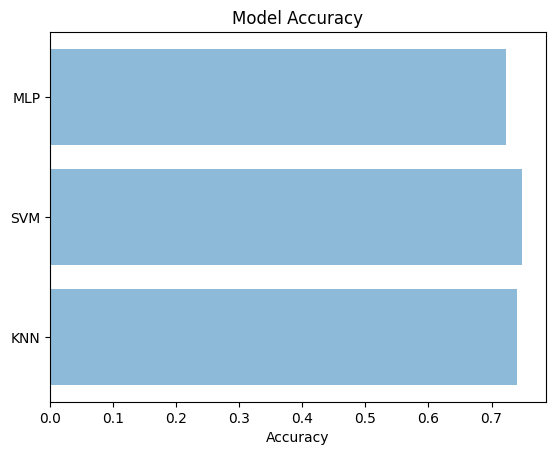

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

labels = ("KNN", "SVM", "MLP")

values = [knn_accuracy, svm_accuracy, mlp_accuracy]

plt.title("Model Accuracy")

plt.xlabel("Accuracy")

y_pos = np.arange(len(labels))
plt.barh(y_pos, values, align="center", alpha=0.5)
plt.yticks(y_pos,labels)

plt.show()